In [1]:
import pandas as pd
import numpy as np


## 1. Pandas DataFrame


In [2]:
ser = pd.Series([17000, 18000, 1000, 5000] , 
               index = ['pizza', 'chicken', 'coke', 'beer'])
ser

pizza      17000
chicken    18000
coke        1000
beer        5000
dtype: int64

In [3]:
ser.values

array([17000, 18000,  1000,  5000], dtype=int64)

In [4]:
ser.index

Index(['pizza', 'chicken', 'coke', 'beer'], dtype='object')

In [5]:
ser[0]
ser[1]
ser[2]
ser['pizza']
print(ser[1:])
print(ser[:2]) 


chicken    18000
coke        1000
beer        5000
dtype: int64
pizza      17000
chicken    18000
dtype: int64


In [6]:
ser.isin([1000])
ser.isin([1000,5000])

pizza      False
chicken    False
coke        True
beer        True
dtype: bool

SERIES로 DF만들기

In [7]:
df = pd.DataFrame(ser)
print(df)
df1 = pd.DataFrame(ser.values, index = ser.index , columns = ['price'])
df1

             0
pizza    17000
chicken  18000
coke      1000
beer      5000


,price
pizza,17000
chicken,18000
coke,1000
beer,5000


In [8]:
print(df1.index)
print(df1.values)
df1.head(2)
df1.tail(2)


Index(['pizza', 'chicken', 'coke', 'beer'], dtype='object')
[[17000]
 [18000]
 [ 1000]
 [ 5000]]


,price
coke,1000
beer,5000


Dictionary로 DF만들기


In [9]:
new_df = {"name" : ['cityace', 'z125', 'cbr125'] , 
        "cc" : [100, 125, 125] , 
         "price" : [30, 300, 200]}
new_df = pd.DataFrame(new_df)


In [10]:
new_df.head()
new_df.index = [1,2,3]


In [11]:
new_df.describe()

,cc,price
count,3.000000,3.000000
mean,116.666667,176.666667
std,14.433757,136.503968
min,100.000000,30.000000
25%,112.500000,115.000000
50%,125.000000,200.000000
75%,125.000000,250.000000
max,125.000000,300.000000


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 3
Data columns (total 3 columns):
name     3 non-null object
cc       3 non-null int64
price    3 non-null int64
dtypes: int64(2), object(1)
memory usage: 96.0+ bytes


In [13]:
new_df.dtypes

name     object
cc        int64
price     int64
dtype: object

In [14]:
new_df.shape

(3, 3)

In [15]:
#컬럼명 바꾸기

new_df.columns
new_df.columns[0]
new_df.columns = ['NAME', 'CC', 'PRICE']
new_df.head()

,NAME,CC,PRICE
1,cityace,100,30
2,z125,125,300
3,cbr125,125,200


컬럼명 바꾸는 또 다른 방법 : rename

In [16]:
df_ex = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df_ex.rename(columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [17]:
new_df.columns.values[0] = 'name' #이렇게도 가능!!!
new_df

,name,CC,PRICE
1,cityace,100,30
2,z125,125,300
3,cbr125,125,200


new_df에 새로운 열을 추가해볼까? 어떻게?

In [18]:
#새로운 열의 이름을 적고 리스트로 넣기. 개수 맞춰줘야 한다. 
new_df["rate"] = [5, 2, 1]
new_df

,name,CC,PRICE,rate
1,cityace,100,30,5
2,z125,125,300,2
3,cbr125,125,200,1


In [19]:
#열 삭제하기
del new_df["rate"] 

In [20]:
new_df["rate"] = 5 #재사용법칙 가능

In [21]:
new_df = new_df.drop("rate", axis = 1) #0은 행, 1은 열
#help(pd.DataFrame.drop)

In [22]:
#열별로 뽑아보기
print(new_df['name']) #이거보다 
new_df[['name']] #이게 낫다. 

1    cityace
2       z125
3     cbr125
Name: name, dtype: object


,name
1,cityace
2,z125
3,cbr125


새로운 행 추가하기

In [23]:
#loc를 이용하여 새로운 행을 추가할 수 있다. 리스트로 넣어주면 됨. 
new_df.loc[len(new_df)] = ['xz100', 100, 100]

말나온 김에 iloc, loc 보자. 

In [24]:
#df.iloc[행숫자 , 열숫자]
new_df.iloc[0,0]
new_df.iloc[0:1,0]
new_df.iloc[[0,1,2] ,[0,2]]
new_df.iloc[:,:] #전체 숫자를 표시할 때는 :을 쓴다. 

#df.loc[ 행숫자?인덱스? , 열숫자?열이름? ]

new_df.loc[:, 'PRICE']
#new_df.loc[0, 'PRICE'] 이렇게는 외 않되..?
new_df.loc[ 0:2 ,['name' , 'CC'] ]

,name,CC
1,cityace,100
2,z125,125


다양한 내장함수를 행, 열방향으로 적용할 수 있다. 

In [25]:
new_df.sum(axis = 0) #행방향 합계
new_df.sum(axis = 1) #열방향 합계

1    130
2    425
3    200
dtype: int64

In [26]:
new_df.mean(axis = 1)

1     65.0
2    212.5
3    100.0
dtype: float64

DF에서 subset하기(열 조건으로 데이터 뽑아내기)

일단 데이터 개수를 좀 늘려보자


In [27]:
new_df['nation'] = ['Korea', 'Japan', 'Japan']
new_df['brand'] = ['Daerim', 'Honda', 'Honda']

In [28]:
bike = {'name' : ['pcx','komat', 'vjfi' , 'griffon' , 'wolf'], 
       'CC' : [125, 600, 125, 125, 125] , 
       'PRICE' : [250, 300, 100, 180, 100], 
       'nation' : ['Japan', 'Korea', 'Korea', 'Italy', 'Taiwan'] , 
       'brand' : ['Honda', 'Hyosung', 'Daerim', 'Italjet', 'SYM'] }

bike = pd.DataFrame(bike)
new_df = new_df.append(bike)

In [29]:
#합쳤으니 인덱스 좀 다시 해주자. 
new_df = new_df.reset_index()

In [30]:
#인덱스도 인덱스인데 데이터 타입 확인해보자. 
new_df.dtypes
#파이썬은 factor 같은 게 없어? R이랑 좀 느낌이 다르네

index      int64
name      object
CC         int64
PRICE      int64
nation    object
brand     object
dtype: object

이제 subset 해보자. 
subset해서 새로운 데이터 프레임으로 넣어줄 수 있음. 

In [31]:
#CC가 125 이상인 애들만 추출
new_df[new_df.CC >= 125]

#생산국가가 한국인 애들만 추출
new_df[new_df.nation == 'Korea']

#생산국가가 Korea이지만 브랜드는 Daerim 이 아닌 오토바이 추출
new_df[(new_df.nation == 'Korea') & (new_df.brand != 'Daerim')]

,index,name,CC,PRICE,nation,brand
4,1,komat,600,300,Korea,Hyosung


그 외 : R에서 unique처럼 쓰기 : set

In [32]:
set(new_df.brand)

{'Daerim', 'Honda', 'Hyosung', 'Italjet', 'SYM'}

## 데이터 엔지니어링 + 시각화 해 보기

csv파일 읽어오기 (nan 값이 있는)

In [33]:
air = pd.read_csv('a.csv')

In [34]:
air.head(5)

,MSRDATE(측정날짜),MSRADMCODE(측정소 행정코드),GRADE(대기환경등급),MAXINDEX(통합대기환경지수),POLLUTANT(지수결정물질),NITROGEN(이산화질소 농도),NITROGENINDEX(이산화질소 지수),OZONE(오존 농도),OZONEINDEX(오존 지수),CARBON(일산화탄소 농도),CARBONINDEX(일산화탄소 지수),SULFUROUS(아황산가스 농도),SULFUROUSINDEX(아황산가스 지수),PM10(미세먼지 농도),PM10INDEX(미세먼지 지수),PM24(미세먼지(24시)농도),PM24INDEX(미세먼지(24시)지수),MSRRGNCODE(권역코드),MSRRGNNAME(권역명),MSRSTENAME(측정소명)
0,2.020000e+11,111171,좋음,47,PM-10,0.027,45,0.026,43,0.6,15.0,0.003,8,41.0,41,47,67,102,동북권,도봉구
1,2.020000e+11,111171,좋음,49,PM-10,0.027,45,0.019,32,0.6,15.0,0.003,8,57.0,57,49,69,102,동북권,도봉구
2,2.020000e+11,111171,좋음,50,PM-10,0.015,25,0.029,48,0.6,15.0,0.003,8,55.0,55,50,70,102,동북권,도봉구
3,2.020000e+11,111171,좋음,50,PM-10,NaN,40,0.016,27,0.7,18.0,0.003,8,46.0,46,50,70,102,동북권,도봉구
4,2.020000e+11,111171,좋음,50,PM-10,0.021,35,0.015,25,0.7,18.0,0.003,8,47.0,47,50,70,102,동북권,도봉구


In [35]:
air.columns

Index(['MSRDATE(측정날짜)', 'MSRADMCODE(측정소 행정코드)', 'GRADE(대기환경등급)',
       'MAXINDEX(통합대기환경지수)', 'POLLUTANT(지수결정물질)', 'NITROGEN(이산화질소 농도)',
       'NITROGENINDEX(이산화질소 지수)', 'OZONE(오존 농도)', 'OZONEINDEX(오존 지수)',
       'CARBON(일산화탄소 농도)', 'CARBONINDEX(일산화탄소 지수)', 'SULFUROUS(아황산가스 농도)',
       'SULFUROUSINDEX(아황산가스 지수)', 'PM10(미세먼지 농도)', 'PM10INDEX(미세먼지 지수)',
       'PM24(미세먼지(24시)농도)', 'PM24INDEX(미세먼지(24시)지수)', 'MSRRGNCODE(권역코드)',
       'MSRRGNNAME(권역명)', 'MSRSTENAME(측정소명)'],
      dtype='object')

In [36]:
#이 데이터 MSRDATE 열이 이상하다. 새로 임의의 날짜 부여해줘야겠다. 
#https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/

a = pd.date_range(start = "2019-01-01", periods = len(air), freq = 'H')
#periods 옵션으로 며칠짜리를 만들것인지 해 줄 수 있다. 
#freq 옵션으로 간격 설정 가능

air[['MSRDATE(측정날짜)']] = a


In [37]:
air.head()

,MSRDATE(측정날짜),MSRADMCODE(측정소 행정코드),GRADE(대기환경등급),MAXINDEX(통합대기환경지수),POLLUTANT(지수결정물질),NITROGEN(이산화질소 농도),NITROGENINDEX(이산화질소 지수),OZONE(오존 농도),OZONEINDEX(오존 지수),CARBON(일산화탄소 농도),CARBONINDEX(일산화탄소 지수),SULFUROUS(아황산가스 농도),SULFUROUSINDEX(아황산가스 지수),PM10(미세먼지 농도),PM10INDEX(미세먼지 지수),PM24(미세먼지(24시)농도),PM24INDEX(미세먼지(24시)지수),MSRRGNCODE(권역코드),MSRRGNNAME(권역명),MSRSTENAME(측정소명)
0,2019-01-01 00:00:00,111171,좋음,47,PM-10,0.027,45,0.026,43,0.6,15.0,0.003,8,41.0,41,47,67,102,동북권,도봉구
1,2019-01-01 01:00:00,111171,좋음,49,PM-10,0.027,45,0.019,32,0.6,15.0,0.003,8,57.0,57,49,69,102,동북권,도봉구
2,2019-01-01 02:00:00,111171,좋음,50,PM-10,0.015,25,0.029,48,0.6,15.0,0.003,8,55.0,55,50,70,102,동북권,도봉구
3,2019-01-01 03:00:00,111171,좋음,50,PM-10,NaN,40,0.016,27,0.7,18.0,0.003,8,46.0,46,50,70,102,동북권,도봉구
4,2019-01-01 04:00:00,111171,좋음,50,PM-10,0.021,35,0.015,25,0.7,18.0,0.003,8,47.0,47,50,70,102,동북권,도봉구


1. nan 값을 어떻게 처리할 것인가? <br>
https://rfriend.tistory.com/263

In [38]:
#일단 nan 값이 얼마나, 어디에 있는지 알고 싶다. 

pd.notnull(air) #이렇게 하면 null값이 아닌 걸 True로 반환
pd.isnull(air)

,MSRDATE(측정날짜),MSRADMCODE(측정소 행정코드),GRADE(대기환경등급),MAXINDEX(통합대기환경지수),POLLUTANT(지수결정물질),NITROGEN(이산화질소 농도),NITROGENINDEX(이산화질소 지수),OZONE(오존 농도),OZONEINDEX(오존 지수),CARBON(일산화탄소 농도),CARBONINDEX(일산화탄소 지수),SULFUROUS(아황산가스 농도),SULFUROUSINDEX(아황산가스 지수),PM10(미세먼지 농도),PM10INDEX(미세먼지 지수),PM24(미세먼지(24시)농도),PM24INDEX(미세먼지(24시)지수),MSRRGNCODE(권역코드),MSRRGNNAME(권역명),MSRSTENAME(측정소명)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
#1) 특정 값으로 채울 수 있다. 나는 결측치를 nan이 아닌 999로 하겠다 하면
air_1 = air.fillna(999)

#2) 혹은 그 열의 평균값으로 채우겠다 하면
air.mean() #nan값 있어도 대충 평균 계산 해준다. 
air_2 = air.fillna(air.mean())

air_2_1 = air.where(pd.notnull(air), air.mean(), axis = 'columns')

#3) 혹은 forward, backward 방향으로 채우겠다 하면
air_3 = air.fillna(method = 'ffill')
air_4 = air.fillna(method = 'bfill')
#limit = 숫자 옵션을 추가하여 앞뒤방향으로 결측값 채우는 횟수를 제한할 수도 있다. 


In [40]:
#4) 혹은 그냥 nan값이 있는 열을 통째로 날릴 수도 있다. 
air_4 = air.dropna(axis = 0) #axis = 1이면 결측값 있는 열 전체 삭제
#dropna(how = any, all) 등의 옵션도 있다. any면 nan이 하나만 있어도 삭제, all이면 모두 nan이어야 삭제


In [41]:
print(air.shape)
print(air_4.shape) #줄어들었다!


(24, 20)
(15, 20)


2. nan값 처리 후 EDA

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/

2 - 1) 각 열 별 describe

In [43]:
air_2.head(5)

,MSRDATE(측정날짜),MSRADMCODE(측정소 행정코드),GRADE(대기환경등급),MAXINDEX(통합대기환경지수),POLLUTANT(지수결정물질),NITROGEN(이산화질소 농도),NITROGENINDEX(이산화질소 지수),OZONE(오존 농도),OZONEINDEX(오존 지수),CARBON(일산화탄소 농도),CARBONINDEX(일산화탄소 지수),SULFUROUS(아황산가스 농도),SULFUROUSINDEX(아황산가스 지수),PM10(미세먼지 농도),PM10INDEX(미세먼지 지수),PM24(미세먼지(24시)농도),PM24INDEX(미세먼지(24시)지수),MSRRGNCODE(권역코드),MSRRGNNAME(권역명),MSRSTENAME(측정소명)
0,2019-01-01 00:00:00,111171,좋음,47,PM-10,0.02700,45,0.026,43,0.6,15.0,0.003,8,41.0,41,47,67,102,동북권,도봉구
1,2019-01-01 01:00:00,111171,좋음,49,PM-10,0.02700,45,0.019,32,0.6,15.0,0.003,8,57.0,57,49,69,102,동북권,도봉구
2,2019-01-01 02:00:00,111171,좋음,50,PM-10,0.01500,25,0.029,48,0.6,15.0,0.003,8,55.0,55,50,70,102,동북권,도봉구
3,2019-01-01 03:00:00,111171,좋음,50,PM-10,0.02319,40,0.016,27,0.7,18.0,0.003,8,46.0,46,50,70,102,동북권,도봉구
4,2019-01-01 04:00:00,111171,좋음,50,PM-10,0.02100,35,0.015,25,0.7,18.0,0.003,8,47.0,47,50,70,102,동북권,도봉구


In [45]:
#기초통계자료
air_2.describe()

,MSRADMCODE(측정소 행정코드),MAXINDEX(통합대기환경지수),NITROGEN(이산화질소 농도),NITROGENINDEX(이산화질소 지수),OZONE(오존 농도),OZONEINDEX(오존 지수),CARBON(일산화탄소 농도),CARBONINDEX(일산화탄소 지수),SULFUROUS(아황산가스 농도),SULFUROUSINDEX(아황산가스 지수),PM10(미세먼지 농도),PM10INDEX(미세먼지 지수),PM24(미세먼지(24시)농도),PM24INDEX(미세먼지(24시)지수),MSRRGNCODE(권역코드)
count,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,111171.0,55.541667,0.023190,39.083333,0.025864,39.250000,0.666667,16.909091,0.003292,8.583333,48.095238,47.541667,47.541667,67.541667,102.0
std,0.0,6.884003,0.007527,13.554773,0.013378,18.411362,0.048154,1.411416,0.000464,0.928611,3.512769,4.699483,1.641292,1.641292,0.0
min,111171.0,47.000000,0.014000,23.000000,0.010000,17.000000,0.600000,15.000000,0.003000,8.000000,41.000000,33.000000,44.000000,64.000000,102.0
25%,111171.0,48.750000,0.017500,27.000000,0.014750,22.750000,0.600000,15.000000,0.003000,8.000000,46.000000,45.750000,47.000000,67.000000,102.0
50%,111171.0,57.000000,0.023000,38.000000,0.025432,37.000000,0.700000,18.000000,0.003000,8.000000,48.000000,48.000000,48.000000,68.000000,102.0
75%,111171.0,63.000000,0.026250,45.000000,0.041000,59.000000,0.700000,18.000000,0.004000,10.000000,49.250000,50.000000,48.250000,68.250000,102.0
max,111171.0,66.000000,0.040000,66.000000,0.048000,65.000000,0.700000,18.000000,0.004000,10.000000,57.000000,57.000000,50.000000,70.000000,102.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


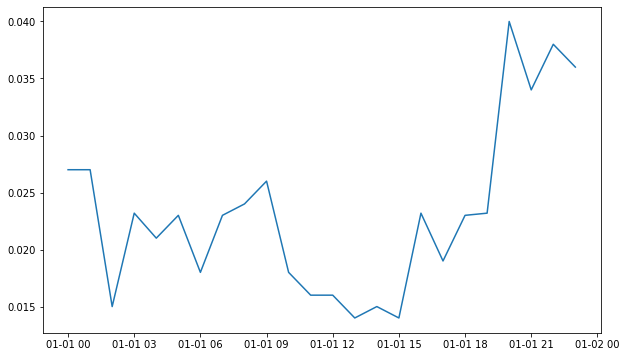

In [46]:
#이산화질소 농도 변화
plt.figure(figsize=(10,6))

x = air_2[['MSRDATE(측정날짜)']]
y = air_2[['NITROGEN(이산화질소 농도)']]

plt.plot(x,y)
plt.show()

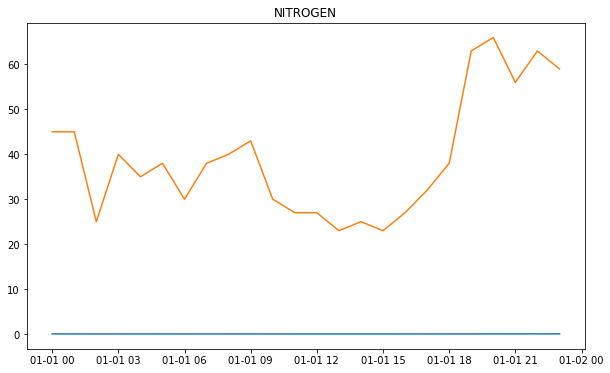

In [47]:
#이산화질소 지수랑 농도랑 같이 그려볼까? 
#너무 차이가 크다.
#지수라는 게 아마 비교를 위해 만들어 진 것 같음.
plt.figure(figsize = (10, 6))

plt.title('NITROGEN')

x = air_2[['MSRDATE(측정날짜)']]
y = air_2[['NITROGEN(이산화질소 농도)']]

z = air_2[['MSRDATE(측정날짜)']]
w = air_2[['NITROGENINDEX(이산화질소 지수)']]

plt.plot(x, y, z, w) #이렇게 겹쳐 그리기 가능. 
#plt.plot(z,w)
plt.show()

In [48]:
#plot 한글 title
#나눔글꼴 설치
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
#왜 설치가 안 됐지?

mpl.rc('font', family = 'Batang') #아쉽지만 바탕체라도 쓰자



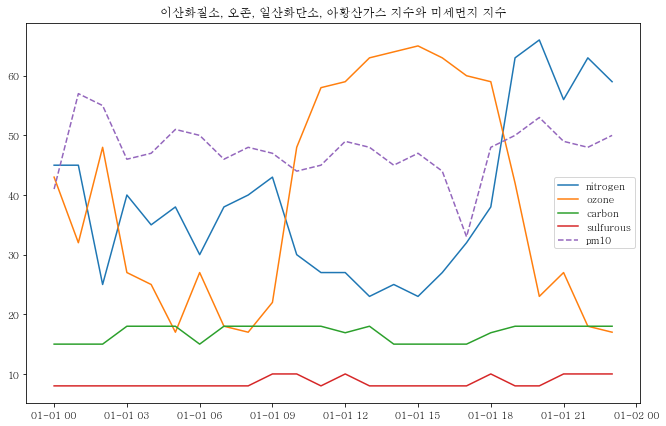

In [49]:
#다 겹쳐버려 + 범례도 만들어

plt. figure(figsize = (11, 7))

plt.title('이산화질소, 오존, 일산화탄소, 아황산가스 지수와 미세먼지 지수')
#
x = air_2[['MSRDATE(측정날짜)']]

nitrogen = air_2[['NITROGENINDEX(이산화질소 지수)']]
ozone = air_2[['OZONEINDEX(오존 지수)']]
carbon = air_2[['CARBONINDEX(일산화탄소 지수)']]
sulfurous = air_2[['SULFUROUSINDEX(아황산가스 지수)']]
pm10 = air_2[['PM10INDEX(미세먼지 지수)']]

plt.plot(x, nitrogen)
plt.plot(x, ozone)
plt.plot(x, carbon)
plt.plot(x, sulfurous)
plt.plot(x, pm10, linestyle = '--')
plt.legend(['nitrogen', 'ozone', 'carbon', 'sulfurous', 'pm10'],loc = 0)

plt.show()

In [50]:
#상관분석, 회귀분석, 주성분분석같은 거 할 수 있으면 좋겠다는 생각. 

그룹 만들기. 


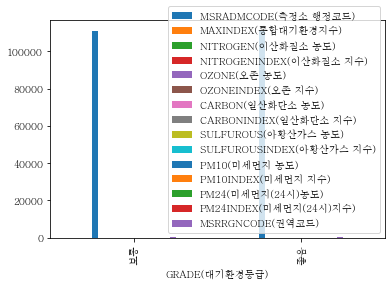

In [62]:
call = air_2.groupby("GRADE(대기환경등급)").mean()
#plt = call.plot(kind = 'bar')

## 2. Numpy

numpy는 array지 <br>
list와 array는 뭐가 다른가요? <br>
array는 다차원배열이 가능합니다. 

In [51]:
data = list(range(5))
data

[0, 1, 2, 3, 4]

In [52]:
array_data = np.array(data)
array_data

array([0, 1, 2, 3, 4])

In [53]:
a1 = [1, 2, 3]
a2 = [4, 5, 6]
array_2 = np.array([a1, a2])
array_2

#세로로는 못 쌓나요? ㅠㅠ
np.array([a1, a2]).reshape(3,2) 

array([[1, 2],
       [3, 4],
       [5, 6]])

In [54]:
np.arange(0, 10) #start, end, step
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [55]:
array_2 = np.arange(1, 7).reshape(3,2) #3행 2열
array_2

array([[1, 2],
       [3, 4],
       [5, 6]])

In [56]:
np.linspace(1, 100, 10) #start, end, 개수
#왜 이렇게 나오는지 이해가 잘 안돼..


array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.])

In [57]:
a6 = np.array(['1.5', '2.3', '3.2'])
a6 = a6.astype(float)
a6.astype(int)

array([1, 2, 3])

In [58]:
array_2.mean(axis = 0)

array([3., 4.])